In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1289,ham,Hey...Great deal...Farm tour 9am to 5pm $95/pa...,NaN,NaN,NaN
623,ham,"sorry, no, have got few things to do. may be i...",NaN,NaN,NaN
5386,ham,I'm at work. Please call,NaN,NaN,NaN
4381,ham,yeah sure thing mate haunt got all my stuff so...,NaN,NaN,NaN
4809,ham,"Honey, can you pls find out how much they sell...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
# 1. data cleaning
# 2. EDA
# 3. Text preprocessing
# 4. Model building
# 5. Evaluation 
# 6. Improvement
# 7. website
# 8. Deploy

# 1. Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
#drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [9]:
df.sample(5)

,v1,v2
4451,ham,I've told you everything will stop. Just dont ...
1047,spam,1000's flirting NOW! Txt GIRL or BLOKE & ur NA...
2403,ham,Jesus christ bitch I'm trying to give you drug...
1790,ham,Am not working but am up to eyes in philosophy...
2963,spam,"Do you ever notice that when you're driving, a..."


In [10]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()

In [13]:
df['target']=encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


ham=0; spam=1

In [15]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
# check for duplicate values
df.duplicated().sum()

403

In [17]:
# remove duplicates
df=df.drop_duplicates(keep='first')

In [18]:
df.shape

(5169, 2)

In [19]:
df.duplicated().sum()

0

# 2. EDA

In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

([<matplotlib.patches.Wedge at 0x16983184be0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

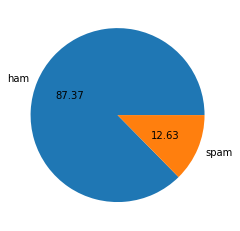

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")

In [22]:
# data is imbalanced

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Deepak
[nltk_data]     sirohiwal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_char']=df['text'].apply(len)

In [27]:
df.head()

,target,text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words
#using nltk to get the number of words in the sample
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [29]:
df.head()

,target,text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
#using nltk to get the number of sentance in the sampledf
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [31]:
df.head()

,target,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df.describe()

,target,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [33]:
#ham
df[df['target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [34]:
#spam
df[df['target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [35]:
import seaborn as sns

<AxesSubplot:xlabel='num_char', ylabel='Count'>

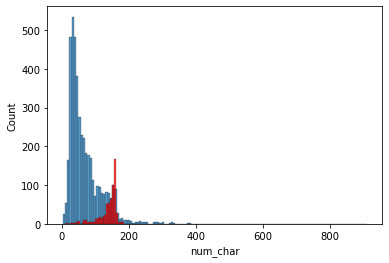

In [36]:
sns.histplot(df[df['target']==0]['num_char']) #ham number of char in a sample
sns.histplot(df[df['target']==1]['num_char'],color='red')#spam

from this plot we can conclude that the spam has longer char length in  a sample as compared to ham

<AxesSubplot:xlabel='num_words', ylabel='Count'>

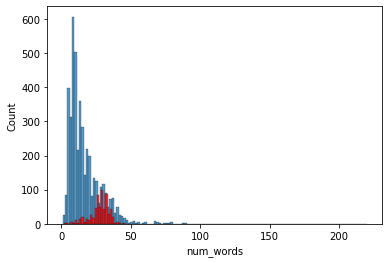

In [37]:
sns.histplot(df[df['target']==0]['num_words']) #ham number of words in a sample
sns.histplot(df[df['target']==1]['num_words'],color='red')#spam

From this plot we can conclude that the spam has longer word length in a sample as compared to ham

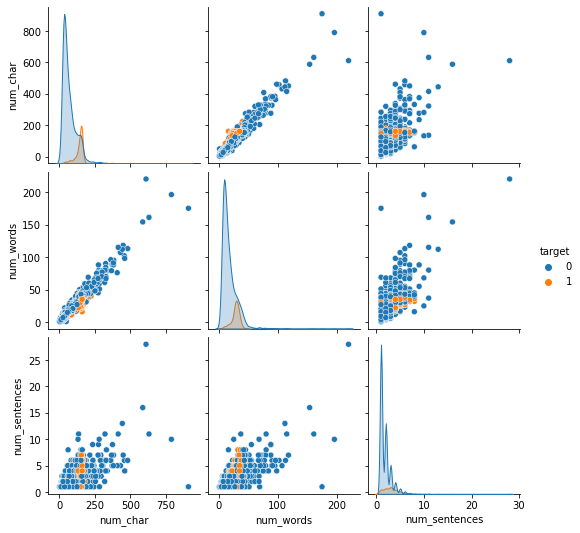

In [38]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

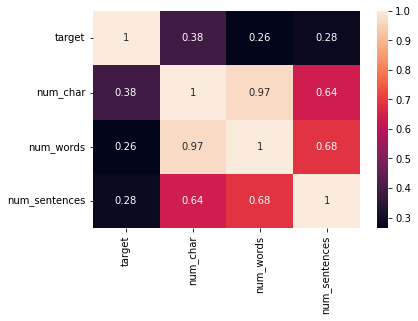

In [39]:
sns.heatmap(df.corr(), annot=True)

# 3. Data preprocessing
* Lower case
* Tokenization
* Removing speacial char
* Removing stop words and punctuation
* Stemming

In [40]:
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

[nltk_data] Downloading package stopwords to C:\Users\Deepak
[nltk_data]     sirohiwal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
ps=PorterStemmer()

In [42]:
def transform_text(text):
    text=text.lower()
    text= nltk.word_tokenize(text)
    #print(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    #making a clone of y
    text=y[:]
    y.clear() #clearing the content of the list and making it empty
    for i in text:
        #checking is the text havve any punctuation and stopwords
        if i not in stopwords.words('english') and string.punctuation:
            y.append(i)
    #stemming the text
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [43]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [44]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [45]:
df['transformed_text']= df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_char,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


### Understanding the data

In [47]:
!pip install wordcloud

In [48]:
#making word cloud of char in spam and ham
from  wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [49]:
#creating a wordcloud of spam sms 
spam_wc=wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" ")) 

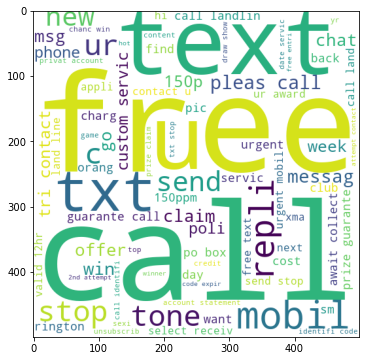

In [50]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [51]:
# creating a wordcloud for ham sms
ham_wc=wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" ")) 

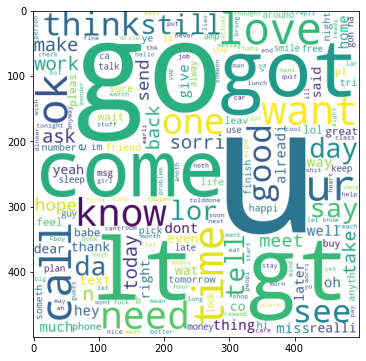

In [52]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

Pulling out top 30 words from ham and spam

In [53]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

c:\Users\Deepak sirohiwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


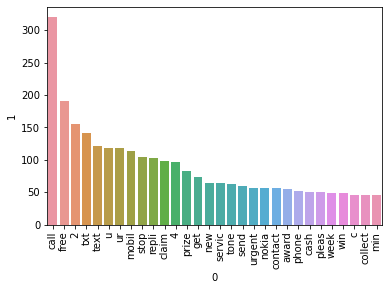

In [55]:
from collections import Counter
most_spam=pd.DataFrame(Counter(spam_corpus).most_common(30)) #creating dataframe of the most occuring word in spam
sns.barplot(most_spam[0],most_spam[1])
plt.xticks(rotation='vertical')
plt.show()

Ploting bar for occurance of words in ham text

In [56]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [57]:
len(ham_corpus)

35394

c:\Users\Deepak sirohiwal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


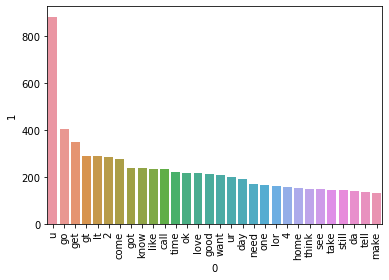

In [58]:

most_ham=pd.DataFrame(Counter(ham_corpus).most_common(30)) #creating dataframe of the most occuring word in spam
sns.barplot(most_ham[0],most_ham[1])
plt.xticks(rotation='vertical')
plt.show()

# 4. Model training

In [59]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
cv=CountVectorizer()
X=cv.fit_transform(df['transformed_text']).toarray()

Here we have transformed the text into vector using CountVectorizer taking feature as the unique words and denoted it as X

In [61]:
X.shape

(5169, 6708)

In [62]:
y=df['target'].values

In [63]:
#splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [64]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()


In [65]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_pred1))
print('confusion_matrix :\n', confusion_matrix(y_test,y_pred1))
print('precision_score :', precision_score(y_test,y_pred1))

accuracy : 0.8800773694390716
confusion_matrix :
 [[792 104]
 [ 20 118]]
precision_score : 0.5315315315315315


In [66]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_pred2))
print('confusion_matrix :\n', confusion_matrix(y_test,y_pred2))
print('precision_score :', precision_score(y_test,y_pred2))

accuracy : 0.9642166344294004
confusion_matrix :
 [[871  25]
 [ 12 126]]
precision_score : 0.8344370860927153


In [67]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_pred3))
print('confusion_matrix :\n', confusion_matrix(y_test,y_pred3))
print('precision_score :', precision_score(y_test,y_pred3))

accuracy : 0.9700193423597679
confusion_matrix :
 [[893   3]
 [ 28 110]]
precision_score : 0.9734513274336283


### Trying using TfidfVectorizer to transform the text

In [68]:
tf=TfidfVectorizer()
X=tf.fit_transform(df['transformed_text']).toarray()
# y will be same

In [69]:
#splitting data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=2)

In [70]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [71]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_pred1))
print('confusion_matrix :\n', confusion_matrix(y_test,y_pred1))
print('precision_score :', precision_score(y_test,y_pred1))

accuracy : 0.8762088974854932
confusion_matrix :
 [[793 103]
 [ 25 113]]
precision_score : 0.5231481481481481


In [72]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_pred2))
print('confusion_matrix :\n', confusion_matrix(y_test,y_pred2))
print('precision_score :', precision_score(y_test,y_pred2))

accuracy : 0.9593810444874274
confusion_matrix :
 [[896   0]
 [ 42  96]]
precision_score : 1.0


In [73]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print('accuracy :',accuracy_score(y_test,y_pred3))
print('confusion_matrix :\n', confusion_matrix(y_test,y_pred3))
print('precision_score :', precision_score(y_test,y_pred3))

accuracy : 0.9700193423597679
confusion_matrix :
 [[893   3]
 [ 28 110]]
precision_score : 0.9734513274336283


Considering the precison score as the data is imbalance, going with MultinomialNB as precision_score is 1

tfidf --> mnb

### Hyperparameter tuning tfidfVectorizer

In [74]:
#creating feature matrix and label matrix for the dataframe
X_new=df['transformed_text']
y_new=df['target']

In [75]:
#splitting the data into training and testing
X_train,X_test,y_train,y_test= train_test_split(X_new,y_new, test_size=0.2, random_state=2)

In [76]:

params={'tif__max_features':[1000,2000,3000]}
#using pipeline ->> 1st transform the text and 2nd fit into the model
naive_pipeline= Pipeline([('tif',TfidfVectorizer()),('clf',MultinomialNB())])
naive_grid=GridSearchCV(naive_pipeline,param_grid=params,cv=5,scoring='precision')
naive_grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tif', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             param_grid={'tif__max_features': [1000, 2000, 3000]},
             scoring='precision')

In [77]:
naive_grid.best_params_

{'tif__max_features': 2000}

In [78]:
y_pred_p=naive_grid.predict(X_test)

In [79]:
print('accuracy :',accuracy_score(y_test,y_pred_p))
print('confusion_matrix :\n', confusion_matrix(y_test,y_pred_p))
print('precision_score :', precision_score(y_test,y_pred_p))

accuracy : 0.9758220502901354
confusion_matrix :
 [[896   0]
 [ 25 113]]
precision_score : 1.0


Conclusion: As we can see, we have tested max_feature of TfidVectorizer on different values and 2000 turned out to be the best parameter with maximum precision score

### Trying for different models

In [80]:
!pip install xgboost

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [82]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [83]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

Defining a function which will take classifier, X_test,X_train and y_test, y_train as arg.This will return precision and accuracy after going through a pipeline of TidfVectorizer having best parameters with different classifier.

In [84]:
def train_clf(clf,X_train,y_train,X_test,y_test):
    com_pipeline= Pipeline([('tif',TfidfVectorizer(max_features=2000)),('clf',clf)])
    com_pipeline.fit(X_train,y_train)
    y_pred=com_pipeline.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [85]:
train_clf(svc,X_train,y_train,X_test,y_test)

(0.9748549323017408, 0.9666666666666667)

In [86]:
accuracy_scores_max = []
precision_scores_max= []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_clf(clf, X_train,y_train,X_test,y_test)
    
    # print("For ",name)
    # print("Accuracy - ",current_accuracy)
    # print("Precision - ",current_precision)
    
    accuracy_scores_max.append(current_accuracy)
    precision_scores_max.append(current_precision)

In [87]:
performance_df_max = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores_max,'Precision':precision_scores_max}).sort_values('Precision',ascending=False)

In [88]:
performance_df_max

,Algorithm,Accuracy,Precision
1,KN,0.913926,1.000000
2,NB,0.975822,1.000000
8,ETC,0.978723,0.983333
5,RF,0.975822,0.974790
0,SVC,0.974855,0.966667
10,xgb,0.972921,0.966102
4,LR,0.960348,0.953271
6,AdaBoost,0.964217,0.939130
9,GBDT,0.950677,0.930693
7,BgC,0.959381,0.863636


### Trying ensemble on the best performing algorithms

In [89]:
from sklearn.ensemble import VotingClassifier

In [90]:
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)
voting= VotingClassifier(estimators=[('svm',svc),('nb',mnb),('etc',etc)], voting='soft')
ens_pipeline= Pipeline([('tif',TfidfVectorizer(max_features=2000)),('clf',voting)])
ens_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tif', TfidfVectorizer(max_features=2000)),
                ('clf',
                 VotingClassifier(estimators=[('svm',
                                               SVC(gamma=1.0, kernel='sigmoid',
                                                   probability=True)),
                                              ('nb', MultinomialNB()),
                                              ('etc',
                                               ExtraTreesClassifier(n_estimators=50,
                                                                    random_state=2))],
                                  voting='soft'))])

In [91]:
y_pred=ens_pipeline.predict(X_test)
print('Accuracy :', accuracy_score(y_test,y_pred))
print('precision :', precision_score(y_test,y_pred))

Accuracy : 0.9796905222437138
precision : 0.9834710743801653


Conclusion: As we can see the precision is smaller than MultinomialNB.So, going with MNB

### Exporting using pickel

In [92]:
import pickle

In [93]:
#model 
naive_pipeline= Pipeline([('tif',TfidfVectorizer(max_features=2000)),('clf',MultinomialNB())])
naive_pipeline.fit(X_train,y_train)

Pipeline(steps=[('tif', TfidfVectorizer(max_features=2000)),
                ('clf', MultinomialNB())])

In [94]:
pickle.dump(naive_pipeline, open('model.pkl','wb'))